## 준비과정

In [42]:

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [43]:
pip install tslearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#jupyter에서 matplotlib을 사용해 만든 graph를 화면에 표시하기 위해 필요
%matplotlib inline 

#아래는 한글을 사용할 때 깨지는 문제에 대한 해결
plt.rc('font', family='NanumBarunGothic') 
#그래프의 축 등에서 음수를 표시할 때 minus sign이 깨지는 것 해결
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

##**시계열 군집 분석**

#데이터 불러오기

In [61]:
#데이터 호출
df_2017 = pd.read_csv("/content/drive/MyDrive/딥러닝논문/데이터/서울시_우리마을가게_상권분석서비스(신_상권_추정매출)_2017년.csv",encoding="cp949")
df_2018 = pd.read_csv("/content/drive/MyDrive/딥러닝논문/데이터/서울시_우리마을가게_상권분석서비스(신_상권_추정매출)_2018년.csv",encoding="cp949")
df_2019 = pd.read_csv("/content/drive/MyDrive/딥러닝논문/데이터/서울시_우리마을가게_상권분석서비스(신_상권_추정매출)_2019년.csv",encoding="cp949")

In [62]:
# 2안 매출합을 다구하고 스케일링하기 위한 필요 데이터 호출
m19 = pd.DataFrame(df_2019[['기준_분기_코드','상권_코드','분기당_매출_금액']])
m17 = pd.DataFrame(df_2017[['기준_분기_코드','상권_코드','분기당_매출_금액']])
m18 = pd.DataFrame(df_2018[['기준_분기_코드','상권_코드','분기당_매출_금액']])

In [63]:
m19 = m19.groupby(['상권_코드','기준_분기_코드']).mean('분기당_매출_금액')
m17 = m17.groupby(['상권_코드','기준_분기_코드']).mean('분기당_매출_금액')
m18 = m18.groupby(['상권_코드','기준_분기_코드']).mean('분기당_매출_금액')

In [64]:
m19 = m19.unstack('기준_분기_코드')
m17 = m17.unstack('기준_분기_코드')
m18 = m18.unstack('기준_분기_코드')

In [65]:
m1719 = pd.concat([m19, m17,m18], axis=1)

In [66]:
m1719

분기당_매출_금액                                            \
기준_분기_코드             1             2             3             4   
상권_코드                                                              
1001491   2.171381e+09  2.219199e+09  2.277047e+09  2.607723e+09   
1001492   6.982171e+09  7.132854e+09  7.049675e+09  9.274260e+09   
1001493   4.046008e+09  4.356617e+09  4.157996e+09  7.453465e+09   
1001494   3.331304e+09  3.079805e+09  3.250770e+09  5.392128e+09   
1001495   3.345795e+09  3.394045e+09  3.475241e+09  4.116359e+09   
...                ...           ...           ...           ...   
2130322   1.808173e+08  1.890642e+08  1.916959e+08  1.633467e+08   
2130323   4.064330e+08  3.164692e+08  4.054148e+08  4.215742e+08   
2130324   1.675879e+08  1.535687e+08  1.701858e+08  2.250149e+08   
2130325   2.031518e+08  2.107689e+08  2.435106e+08  2.680997e+08   
2130326   1.839530e+08  1.870076e+08  1.695283e+08  2.704860e+08   

                                                                  \
기준_분기_코드             1             2             3             4   
상권_코드                                                              
1001491   2.058374e+09  2.372168e+09  2.352213e+09  2.462170e+09   
1001492   8.312460e+09  8.830159e+09  8.632131e+09  8.231552e+09   
1001493   4.417417e+09  5.243879e+09  4.943917e+09  5.127374e+09   
1001494   3.459270e+09  3.666233e+09  3.618787e+09  3.811213e+09   
1001495   2.949589e+09  3.190222e+09  3.354995e+09  3.117730e+09   
...                ...           ...           ...           ...   
2130322   1.927402e+08  1.952867e+08  2.034335e+08  2.098953e+08   
2130323   3.890631e+08  3.646647e+08  3.659048e+08  3.808210e+08   
2130324   1.350818e+08  1.405545e+08  1.317354e+08  1.521173e+08   
2130325   2.042028e+08  2.057515e+08  1.895487e+08  1.989839e+08   
2130326   2.256073e+08  2.184620e+08  2.172190e+08  2.011416e+08   

                                                                  
기준_분기_코드             1             2             3             4  
상권_코드                                                             
1001491   2.184378e+09  2.468332e+09  2.339092e+09  2.832482e+09  
1001492   8.110231e+09  8.948912e+09  8.377792e+09  8.562547e+09  
1001493   4.294786e+09  4.965446e+09  4.398797e+09  5.012423e+09  
1001494   3.403005e+09  3.774595e+09  3.678830e+09  4.036581e+09  
1001495   3.159853e+09  3.575720e+09  4.015320e+09  3.942979e+09  
...                ...           ...           ...           ...  
2130322   2.113083e+08  2.021558e+08  2.093592e+08  2.036587e+08  
2130323   3.840774e+08  3.568534e+08  3.933092e+08  4.131504e+08  
2130324   1.393690e+08  1.370241e+08  1.404860e+08  1.720991e+08  
2130325   1.934500e+08  1.897728e+08  1.998279e+08  2.043604e+08  
2130326   2.079091e+08  2.149450e+08  2.146671e+08  2.295124e+08  

[1657 rows x 12 columns]

In [67]:
m1719.isnull().sum()

           기준_분기_코드
분기당_매출_금액  1           10
           2           10
           3            9
           4            7
           1            1
           2            1
           3            2
           4            2
           1            4
           2            4
           3            3
           4            2
dtype: int64

In [68]:
m1719 = m1719.dropna(axis=0)

In [69]:
m1719.shape

(1645, 12)

In [70]:
m1719

분기당_매출_금액                                            \
기준_분기_코드             1             2             3             4   
상권_코드                                                              
1001491   2.171381e+09  2.219199e+09  2.277047e+09  2.607723e+09   
1001492   6.982171e+09  7.132854e+09  7.049675e+09  9.274260e+09   
1001493   4.046008e+09  4.356617e+09  4.157996e+09  7.453465e+09   
1001494   3.331304e+09  3.079805e+09  3.250770e+09  5.392128e+09   
1001495   3.345795e+09  3.394045e+09  3.475241e+09  4.116359e+09   
...                ...           ...           ...           ...   
2130322   1.808173e+08  1.890642e+08  1.916959e+08  1.633467e+08   
2130323   4.064330e+08  3.164692e+08  4.054148e+08  4.215742e+08   
2130324   1.675879e+08  1.535687e+08  1.701858e+08  2.250149e+08   
2130325   2.031518e+08  2.107689e+08  2.435106e+08  2.680997e+08   
2130326   1.839530e+08  1.870076e+08  1.695283e+08  2.704860e+08   

                                                                  \
기준_분기_코드             1             2             3             4   
상권_코드                                                              
1001491   2.058374e+09  2.372168e+09  2.352213e+09  2.462170e+09   
1001492   8.312460e+09  8.830159e+09  8.632131e+09  8.231552e+09   
1001493   4.417417e+09  5.243879e+09  4.943917e+09  5.127374e+09   
1001494   3.459270e+09  3.666233e+09  3.618787e+09  3.811213e+09   
1001495   2.949589e+09  3.190222e+09  3.354995e+09  3.117730e+09   
...                ...           ...           ...           ...   
2130322   1.927402e+08  1.952867e+08  2.034335e+08  2.098953e+08   
2130323   3.890631e+08  3.646647e+08  3.659048e+08  3.808210e+08   
2130324   1.350818e+08  1.405545e+08  1.317354e+08  1.521173e+08   
2130325   2.042028e+08  2.057515e+08  1.895487e+08  1.989839e+08   
2130326   2.256073e+08  2.184620e+08  2.172190e+08  2.011416e+08   

                                                                  
기준_분기_코드             1             2             3             4  
상권_코드                                                             
1001491   2.184378e+09  2.468332e+09  2.339092e+09  2.832482e+09  
1001492   8.110231e+09  8.948912e+09  8.377792e+09  8.562547e+09  
1001493   4.294786e+09  4.965446e+09  4.398797e+09  5.012423e+09  
1001494   3.403005e+09  3.774595e+09  3.678830e+09  4.036581e+09  
1001495   3.159853e+09  3.575720e+09  4.015320e+09  3.942979e+09  
...                ...           ...           ...           ...  
2130322   2.113083e+08  2.021558e+08  2.093592e+08  2.036587e+08  
2130323   3.840774e+08  3.568534e+08  3.933092e+08  4.131504e+08  
2130324   1.393690e+08  1.370241e+08  1.404860e+08  1.720991e+08  
2130325   1.934500e+08  1.897728e+08  1.998279e+08  2.043604e+08  
2130326   2.079091e+08  2.149450e+08  2.146671e+08  2.295124e+08  

[1645 rows x 12 columns]

#데이터 스케일링 time  어쩌구 ~

In [71]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, \
    TimeSeriesResampler


In [72]:
t_m1719 = TimeSeriesScalerMeanVariance(mu=0., std=1.).fit_transform(m1719).squeeze(axis = 2)

In [73]:
t_m1719.shape

(1645, 12)

In [74]:
#데이터의 형태
pd.DataFrame(t_m1719)

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.942125,-0.705845,-0.420005,1.213950,-1.500526,0.050015,-0.048592,0.494734,-0.877905,0.525184,-0.113427,2.324543
1,-1.668977,-1.463103,-1.576749,1.462634,0.148556,0.855873,0.585313,0.038014,-0.127743,1.018122,0.237818,0.490242
2,-0.942972,-0.586724,-0.814529,2.965147,-0.516990,0.430904,0.086869,0.297281,-0.657640,0.111561,-0.538347,0.165440
3,-0.664250,-1.107094,-0.806055,2.964486,-0.438925,-0.074502,-0.158045,0.180782,-0.537998,0.116305,-0.052320,0.577615
4,-0.344662,-0.210578,0.015063,1.796703,-1.445702,-0.776993,-0.319097,-0.978446,-0.861388,0.294291,1.515922,1.314888
...,...,...,...,...,...,...,...,...,...,...,...,...
1640,-1.143772,-0.525092,-0.327658,-2.454430,-0.249317,-0.058275,0.552901,1.037669,1.143673,0.457049,0.997452,0.569800
1641,0.834944,-2.390473,0.798440,1.377793,0.212192,-0.662547,-0.618087,-0.083308,0.033443,-0.942602,0.364425,1.075779
1642,0.486891,-0.073254,0.590693,2.781417,-0.811906,-0.593239,-0.945612,-0.131245,-0.640610,-0.734299,-0.595977,0.667141
1643,-0.275479,0.066611,1.537064,2.641382,-0.228279,-0.158727,-0.886408,-0.462664,-0.711195,-0.876343,-0.424761,-0.221201


# 데이터 분석

In [75]:
from tslearn.clustering import TimeSeriesKMeans
modelT = TimeSeriesKMeans(n_clusters=6, metric="dtw", max_iter=100) 
modelT.fit_transform(t_m1719)

/usr/local/lib/python3.8/dist-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1645 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


array([[3.32245733, 2.99545728, 2.76170605, 2.66481749, 2.91747397,
        1.17975604],
       [4.28785239, 2.45631655, 2.14026839, 1.61051684, 3.58755119,
        3.05323823],
       [3.89852656, 0.96130589, 2.78271337, 2.77554962, 2.6424152 ,
        3.09102718],
       ...,
       [2.59552188, 1.96619572, 2.85612571, 3.83946282, 1.04832134,
        2.92693221],
       [2.93739714, 1.60565983, 2.89051728, 3.29833636, 1.71731922,
        3.33694525],
       [3.76014536, 1.71485231, 2.66352937, 2.34400629, 3.4663309 ,
        2.81398616]])

In [76]:
modelT.cluster_centers_.shape

(6, 12, 1)

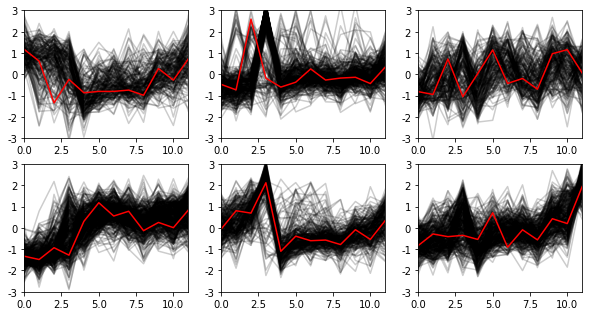

In [79]:
sz = t_m1719.shape[1]

plt.figure(figsize=(10,8))
for yi in range(6):
    plt.subplot(3,3, yi + 1)
    for xx in range(len(modelT.labels_)):
          if modelT.labels_[xx] == yi:
                plt.plot(t_m1719[xx], "k-", alpha=0.2)
                
    plt.xlim(0, sz-1)
    plt.ylim(-3, 3)
    plt.plot(modelT.cluster_centers_[yi].ravel(), "r-")


In [80]:
modelT.cluster_centers_[0].ravel() # 중심점 위치들

array([ 1.1713405 ,  0.62235296, -1.33879635, -0.23709971, -0.86374554,
       -0.80013657, -0.79968771, -0.73826381, -0.97993141,  0.27047547,
       -0.26991606,  0.72453304])